# Desafio 01

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

sns.set_style("whitegrid")

diabetes = pd.read_csv(r"C:\Users\gabriel.paoli\Github\trilha_IA\desafio_01\diabetes.csv")
diabetes_01 = pd.read_csv(r"C:\Users\gabriel.paoli\Github\trilha_IA\desafio_01\diabetes.csv")
diabetes_01 = diabetes_01[(diabetes_01['BMI'] != 0) & (diabetes_01['SkinThickness'] != 0)]

#### 1 - Quantas pessoas tem diabetes?

In [2]:
# .where filters all the rows and make the other non filtered will be set to NaN
# .dropna is to remove all NaN rows
number_of_diabetes = len(diabetes_01[diabetes['Outcome'] == 1].index)

print(f'Number of people with diabetes: {number_of_diabetes}')

Number of people with diabetes: 180


<ipython-input-2-d406c9a7c8e0>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  number_of_diabetes = len(diabetes_01[diabetes['Outcome'] == 1].index)


<AxesSubplot:xlabel='Outcome', ylabel='count'>

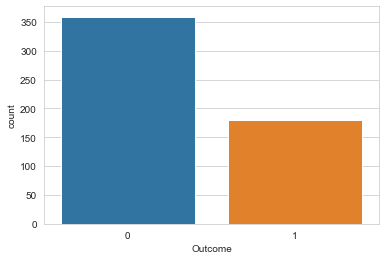

In [3]:
sns.countplot(data = diabetes_01, x = 'Outcome')

#### 2 - Qual a média das pessoas com diabetes?

In [4]:
number_of_people = len(diabetes_01.index)

print(f'Since the total of people with diabetes is: {number_of_people}')
print(f'And the total number of people with diabetes is: {number_of_diabetes}')
print(f'The ratio of people that have diabetes in this table is: {(number_of_diabetes / number_of_people) * 100}%')

Since the total of people with diabetes is: 539
And the total number of people with diabetes is: 180
The ratio of people that have diabetes in this table is: 33.39517625231911%


#### 3 - Qual a pressão sanguinea média das pessoas com diabetes?

In [5]:
total_bloodpressure_diabetes = diabetes_01[diabetes['Outcome'] == 1]['BloodPressure'].sum()

total_bloodpressure_diabetes / number_of_diabetes

<ipython-input-5-a4ce8b7adea2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_bloodpressure_diabetes = diabetes_01[diabetes['Outcome'] == 1]['BloodPressure'].sum()


74.27777777777777

#### 4 - Existe alguma relação entre idade e diabetes?

In [6]:
diabetes_01.loc[diabetes_01['Age'] <= 90, 'Age_Cat'] = 'Under 90s'
diabetes_01.loc[diabetes_01['Age'] <= 70, 'Age_Cat'] = 'Under 70s'
diabetes_01.loc[diabetes_01['Age'] <= 60, 'Age_Cat'] = 'Under 60s'
diabetes_01.loc[diabetes_01['Age'] <= 50, 'Age_Cat'] = 'Under 50s'
diabetes_01.loc[diabetes_01['Age'] <= 40, 'Age_Cat'] = 'Under 40s'
diabetes_01.loc[diabetes_01['Age'] <= 30, 'Age_Cat'] = 'Under 30s'

Text(0.5, 1.0, '71 - 90')

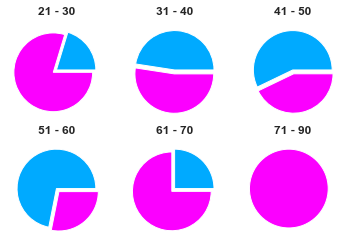

In [7]:
fig1, ax1 = plt.subplots(nrows=2, ncols=3)

labels = 'Has diabetes', 'Has no diabetes'
colors = ['#00aaff', '#fb00ff']
#         DIABETES   NO DIABETES
explode = (0, 0.1)
explode2 = (0.1, 0)

sizes = [
    len(diabetes_01.where(diabetes_01['Outcome'] == 1).where(diabetes_01['Age_Cat'] == 'Under 30s').dropna().index),
    len(diabetes_01.where(diabetes_01['Outcome'] == 0).where(diabetes_01['Age_Cat'] == 'Under 30s').dropna().index)
]
ax1[0,0].pie(
    sizes,
    explode=explode,
    colors=colors
)
ax1[0,0].set_title('21 - 30', fontweight='bold')

sizes = [
    len(diabetes_01.where(diabetes_01['Outcome'] == 1).where(diabetes_01['Age_Cat'] == 'Under 40s').dropna().index),
    len(diabetes_01.where(diabetes_01['Outcome'] == 0).where(diabetes_01['Age_Cat'] == 'Under 40s').dropna().index)
]
ax1[0,1].pie(
    sizes,
    explode=explode,
    colors=colors
)
ax1[0,1].set_title('31 - 40', fontweight='bold')

sizes = [
    len(diabetes_01.where(diabetes_01['Outcome'] == 1).where(diabetes_01['Age_Cat'] == 'Under 50s').dropna().index),
    len(diabetes_01.where(diabetes_01['Outcome'] == 0).where(diabetes_01['Age_Cat'] == 'Under 50s').dropna().index)
]
ax1[0,2].pie(
    sizes,
    explode=explode,
    colors=colors
)
ax1[0,2].set_title('41 - 50', fontweight='bold')

sizes = [
    len(diabetes_01.where(diabetes_01['Outcome'] == 1).where(diabetes_01['Age_Cat'] == 'Under 60s').dropna().index),
    len(diabetes_01.where(diabetes_01['Outcome'] == 0).where(diabetes_01['Age_Cat'] == 'Under 60s').dropna().index)
]
ax1[1,0].pie(
    sizes,
    explode=explode,
    colors=colors
)
ax1[1,0].set_title('51 - 60', fontweight='bold')

sizes = [
    len(diabetes_01.where(diabetes_01['Outcome'] == 1).where(diabetes_01['Age_Cat'] == 'Under 70s').dropna().index),
    len(diabetes_01.where(diabetes_01['Outcome'] == 0).where(diabetes_01['Age_Cat'] == 'Under 70s').dropna().index)
]
ax1[1,1].pie(
    sizes,
    explode=explode,
    colors=colors
)
ax1[1,1].set_title('61 - 70', fontweight='bold')

sizes = [
    len(diabetes_01[(diabetes_01['Outcome'] == 1) & (diabetes_01['Age_Cat'] == 'Under 90s')].index),
    len(diabetes_01[(diabetes_01['Outcome'] == 0) & (diabetes_01['Age_Cat'] == 'Under 90s')].index)
]
ax1[1,2].pie(
    sizes,
    explode=explode,
    colors=colors
)
ax1[1,2].set_title('71 - 90', fontweight='bold')

Com as informações obtidas pelo gráfico podemos concluir que pessoas mais velhas possuem uma propensão maior a adquirir diabetes, podemos chegar a essa conclusão por causa da proporção entre a quantidade de pessoas com diabetes e sem diabetes.

Outra possível conclusão é que a expectativa de vida de pessoas com diabetes é menor que as sem diabetes, por isso temos que de 71 a 90 nenhuma das pessoas participantes da pesquisa possuem diabetes.

#### 5 - Relação entre grossura de pele, IMC e diabetes

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

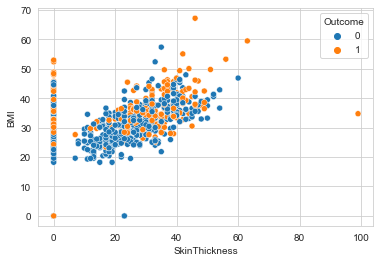

In [8]:
sns.scatterplot(
    data=diabetes,
    x='SkinThickness',
    y='BMI',
    hue='Outcome',
)

Com esse gráfico podemos perceber 2 erros graves que possam ter interferido em alguma outra analise anterior, esses dois erros são:

- 0 IMC
- 0 Grossura de pele

Chegamos a essa conclusão, pois não é possível alguem possuir uma pele com grosseria igual 0, nesse caso a pessoa não teria pele e isso é impossível. Temos, também, o IMC igual 0 que também é impossível, pois dessa forma a pessoa teria um peso igual a 0 ou uma altura infinita.

Uma caracteristica estranha é a de IMC acima de 60 (mas é possível) e outra é a grosseria de pele proxima a 100 (que está muito longe do normal que é entre ~10 até ~60).

Com todas essas novas caracteristicas obtidas iremos atualizar a nossa tabela selecionando somente os dados realmente possiveis.

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

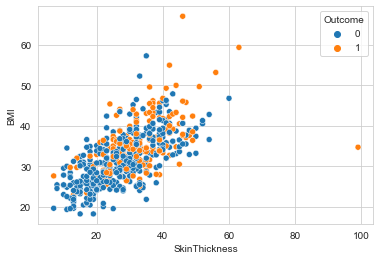

In [9]:
diabetes = diabetes[(diabetes['BMI'] != 0) & (diabetes['SkinThickness'] != 0)]

sns.scatterplot(
    data=diabetes,
    x='SkinThickness',
    y='BMI',
    hue='Outcome',
)

Agora, com esses dados atualizados podemos concluir que pode sim existir alguma relação entre a grossura da pele, IMC e diabetes.

- Existe uma possibilidade de que pessoas com diabetes não possuam pele mais grossa que o as sem diabetes, pelo fato de estarem igualmente dispersas entre o IMC igual a 30 e 40.
- Existe a possibilidade de que pessoas obesas (IMC alto) tenham uma propensão maior a ter diabetes.

Obviamente, o IMC se relaciona diretamente com a grossura da pele, pois a camada de gordura é maior.

#### 6 - Existe relação entre diabetes e hereditariedade?

Temos a coluna DiabetesPedigreeFunction, que é um valor que depende diretamente dos familiares diabeticos ou não. É um calculo realizado para determinar uma possível tendência à pessoa ter diabetes.

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

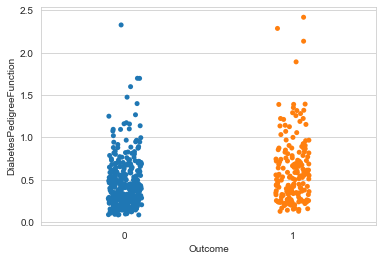

In [10]:
sns.stripplot(
    data=diabetes,
    x='Outcome',
    y='DiabetesPedigreeFunction',
)

Podemos concluir que existe sim uma relação entre DiabetesPedigreeFunction e diabetes, ou seja, diabetes tem relação genética.

Pode-se perceber que quanto mais próximo a 0 a proporção de pessoas sem diabetes é bem maior que as outras.

Além disso é possível dizer que é mais fácil ter diabetes quando algum parente (como pai e mãe) teve diabetes antes da gravidez.